In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd

In [2]:
data = pd.read_parquet("generated_files/bio_variables_dataframe_occurence_and_abscence.parquet").drop(columns=['Latitude','Longitude'])

In [3]:
fillers = data['01_annual_mean_temp'].min()

In [4]:
data = data[data['01_annual_mean_temp'] != fillers].reset_index(drop=True)

In [5]:
cols_1 = ['01_annual_mean_temp', '10_mean_temp_warmest_quarter',
       '11_mean_temp_coldest_quarter', '12_annual_precipitation',
       '13_precipitation_wettest_month', '14_precipitation_driest_month',
       '15_precipitation_seasonality', '16_precipitation_of_wettest_quarter',
       '17_precipitation_of_driest_quarter',
       '18_precipitation_of_warmest_quarter',
       '19_precipitation_of_coldest_quarter', '02_mean_diurnal_range',
       '03_isothermality', '04_temperature_seasonality',
       '05_maximum_temp_warmest_month', '06_minimum_temp_coldest_month',
       '07_temp_annual_range', '08_mean_temp_wettest_quarter',
       '09_mean_temp_driest_quarter']

In [6]:
X = pd.DataFrame(normalize(data[cols_1]), columns = cols_1)
y = data['presence']

In [7]:
# ML 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import model_selection 
from sklearn import metrics
import matplotlib.pyplot as plt

In [8]:
# ML classifier dictionary: name: (model)
CLASS_MAP = {
    'RF': (RandomForestClassifier()), 
    'ET': (ExtraTreesClassifier()), 
    'ADA' : (AdaBoostClassifier()), 
    'BAG' : (BaggingClassifier()), 
    'GRA' : (GradientBoostingClassifier()), 
    'XGB': (XGBClassifier()), 
    'LGBM': (LGBMClassifier()), 
    'Maxent':(LogisticRegression(max_iter=1000)), 
    }

In [9]:
# ROC 
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [10]:
# Classifier evaluation functions (modify pyimpute function)
def evaluate_clf(
    clf, X, y, name, k=None, test_size=0.2, scoring="f1_weighted", feature_names=None
):
    print(name)
    X_train, X_test, y_train, y_true = model_selection.train_test_split(
        X, y,
        test_size=test_size, # Test data size
        shuffle=True, # Shuffle the data before split
        stratify=y # Keeping the appearance/non-appearance ratio of Y
    )

    if k: # Cross-validation
        kf = model_selection.KFold(n_splits=k) # k-fold
        scores = model_selection.cross_val_score(clf, X_train, y_train, cv=kf, scoring=scoring)
        print(name + " %d-fold Cross Validation Accuracy: %0.2f (+/- %0.2f)"
              % (k, scores.mean() * 100, scores.std() * 200))
        print()
    
    clf.fit(X_train, y_train) # Training of classifiers
    y_pred = clf.predict(X_test) # Classifier predictions
    
    # Classifier evaluation metrics
    print("Accuracy Score: %.2f" % metrics.accuracy_score(y_true, y_pred))
    print()

    print("Classification report")
    print(metrics.classification_report(y_true, y_pred))
    print()

    print("Confussion matrix")
    print(metrics.confusion_matrix(y_true, y_pred))
    print()
    
    print('AUC(ROC): %.2f'% metrics.roc_auc_score(y_true, y_pred))
    print()
       
    # ROC 
    probs = clf.predict_proba(X_test) 
    prob = probs[:, 1]  
    fper, tper, thresholds = metrics.roc_curve(y_true, prob)
    plot_roc_curve(fper, tper)

    if hasattr(clf, "feature_importances_"):
        print("Feature importances")
        for f, imp in zip(feature_names, clf.feature_importances_):
            print("%20s: %s" % (f, round(imp * 100, 1)))
        print()

In [11]:
small_columns = ['01_annual_mean_temp',
       '12_annual_precipitation',
       '04_temperature_seasonality',
       '06_minimum_temp_coldest_month',
       '07_temp_annual_range']

In [12]:
even_smaller_columns = ['01_annual_mean_temp',
       '12_annual_precipitation']

RF
RF 5-fold Cross Validation Accuracy: 93.87 (+/- 1.49)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       140
           1       0.96      0.98      0.97       570

    accuracy                           0.95       710
   macro avg       0.94      0.90      0.92       710
weighted avg       0.95      0.95      0.95       710


Confussion matrix
[[114  26]
 [ 10 560]]

AUC(ROC): 0.90



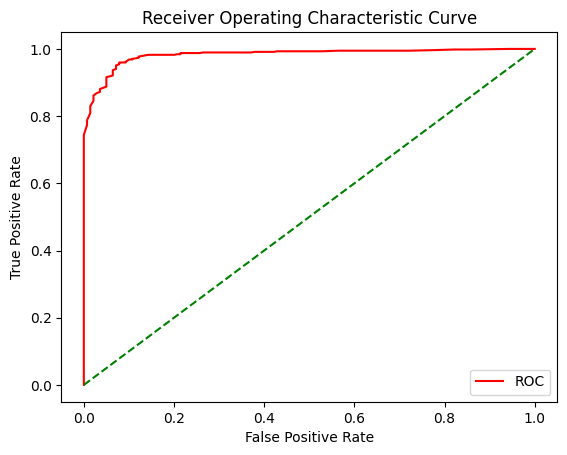

Feature importances
 01_annual_mean_temp: 9.9
10_mean_temp_warmest_quarter: 7.9
11_mean_temp_coldest_quarter: 8.2
12_annual_precipitation: 3.3
13_precipitation_wettest_month: 2.7
14_precipitation_driest_month: 3.5
15_precipitation_seasonality: 3.6
16_precipitation_of_wettest_quarter: 3.3
17_precipitation_of_driest_quarter: 3.0
18_precipitation_of_warmest_quarter: 6.5
19_precipitation_of_coldest_quarter: 3.0
02_mean_diurnal_range: 3.3
    03_isothermality: 4.4
04_temperature_seasonality: 4.8
05_maximum_temp_warmest_month: 8.6
06_minimum_temp_coldest_month: 7.3
07_temp_annual_range: 3.9
08_mean_temp_wettest_quarter: 3.6
09_mean_temp_driest_quarter: 9.0

ET
ET 5-fold Cross Validation Accuracy: 94.07 (+/- 2.40)

Accuracy Score: 0.94

Classification report
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       140
           1       0.94      0.99      0.96       570

    accuracy                           0.94       710
   macro avg       0

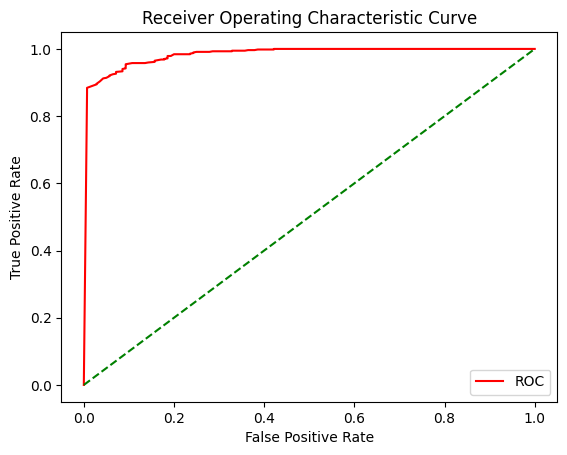

Feature importances
 01_annual_mean_temp: 8.8
10_mean_temp_warmest_quarter: 6.9
11_mean_temp_coldest_quarter: 8.1
12_annual_precipitation: 3.8
13_precipitation_wettest_month: 3.8
14_precipitation_driest_month: 3.8
15_precipitation_seasonality: 4.8
16_precipitation_of_wettest_quarter: 4.2
17_precipitation_of_driest_quarter: 3.5
18_precipitation_of_warmest_quarter: 4.7
19_precipitation_of_coldest_quarter: 3.7
02_mean_diurnal_range: 4.7
    03_isothermality: 5.2
04_temperature_seasonality: 5.5
05_maximum_temp_warmest_month: 5.9
06_minimum_temp_coldest_month: 7.3
07_temp_annual_range: 4.3
08_mean_temp_wettest_quarter: 3.8
09_mean_temp_driest_quarter: 7.3

ADA


c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scra

ADA 5-fold Cross Validation Accuracy: 91.56 (+/- 2.94)



c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.91

Classification report
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       140
           1       0.93      0.96      0.94       570

    accuracy                           0.91       710
   macro avg       0.87      0.83      0.85       710
weighted avg       0.91      0.91      0.91       710


Confussion matrix
[[ 99  41]
 [ 24 546]]

AUC(ROC): 0.83



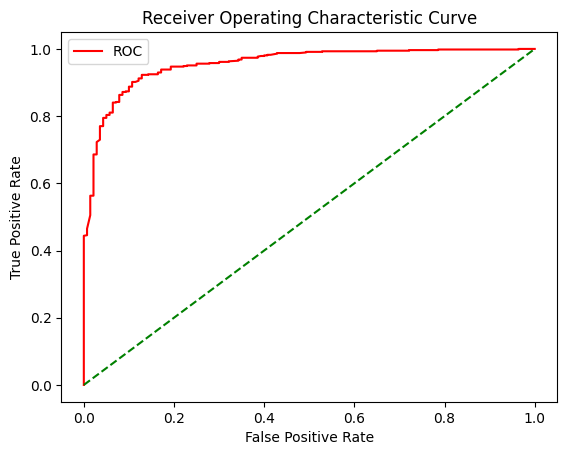

Feature importances
 01_annual_mean_temp: 2.0
10_mean_temp_warmest_quarter: 2.0
11_mean_temp_coldest_quarter: 6.0
12_annual_precipitation: 6.0
13_precipitation_wettest_month: 6.0
14_precipitation_driest_month: 10.0
15_precipitation_seasonality: 2.0
16_precipitation_of_wettest_quarter: 2.0
17_precipitation_of_driest_quarter: 2.0
18_precipitation_of_warmest_quarter: 12.0
19_precipitation_of_coldest_quarter: 4.0
02_mean_diurnal_range: 12.0
    03_isothermality: 4.0
04_temperature_seasonality: 8.0
05_maximum_temp_warmest_month: 4.0
06_minimum_temp_coldest_month: 4.0
07_temp_annual_range: 0.0
08_mean_temp_wettest_quarter: 4.0
09_mean_temp_driest_quarter: 10.0

BAG
BAG 5-fold Cross Validation Accuracy: 93.65 (+/- 2.49)

Accuracy Score: 0.94

Classification report
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       140
           1       0.95      0.97      0.96       570

    accuracy                           0.94       710
   macro avg  

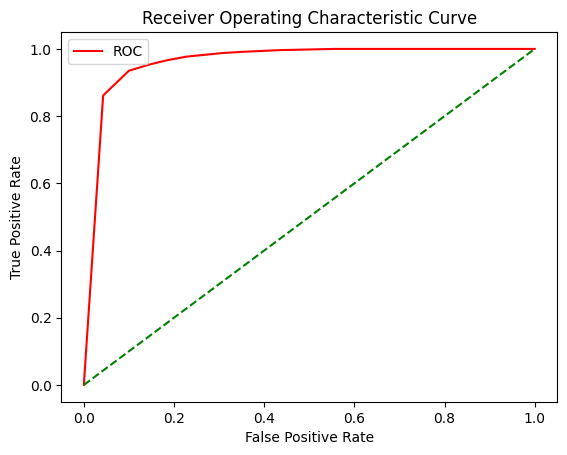

GRA
GRA 5-fold Cross Validation Accuracy: 94.15 (+/- 2.05)

Accuracy Score: 0.93

Classification report
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       140
           1       0.94      0.97      0.95       570

    accuracy                           0.93       710
   macro avg       0.90      0.86      0.88       710
weighted avg       0.92      0.93      0.92       710


Confussion matrix
[[104  36]
 [ 17 553]]

AUC(ROC): 0.86



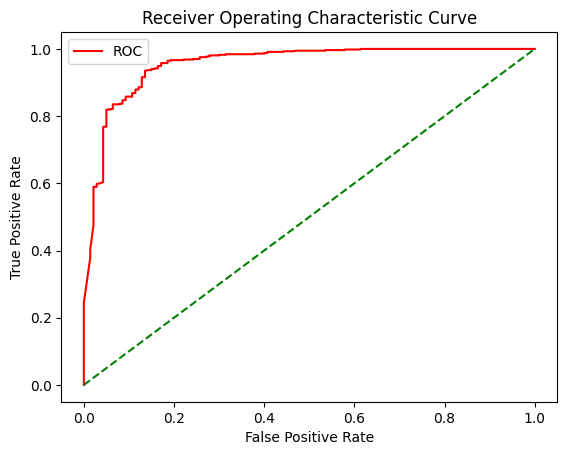

Feature importances
 01_annual_mean_temp: 33.1
10_mean_temp_warmest_quarter: 1.2
11_mean_temp_coldest_quarter: 9.5
12_annual_precipitation: 1.2
13_precipitation_wettest_month: 0.7
14_precipitation_driest_month: 6.4
15_precipitation_seasonality: 0.8
16_precipitation_of_wettest_quarter: 0.9
17_precipitation_of_driest_quarter: 0.5
18_precipitation_of_warmest_quarter: 14.2
19_precipitation_of_coldest_quarter: 2.2
02_mean_diurnal_range: 3.2
    03_isothermality: 1.2
04_temperature_seasonality: 4.8
05_maximum_temp_warmest_month: 1.2
06_minimum_temp_coldest_month: 5.0
07_temp_annual_range: 2.3
08_mean_temp_wettest_quarter: 0.2
09_mean_temp_driest_quarter: 11.4

XGB
XGB 5-fold Cross Validation Accuracy: 93.71 (+/- 1.84)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       140
           1       0.96      0.98      0.97       570

    accuracy                           0.95       710
   macro avg   

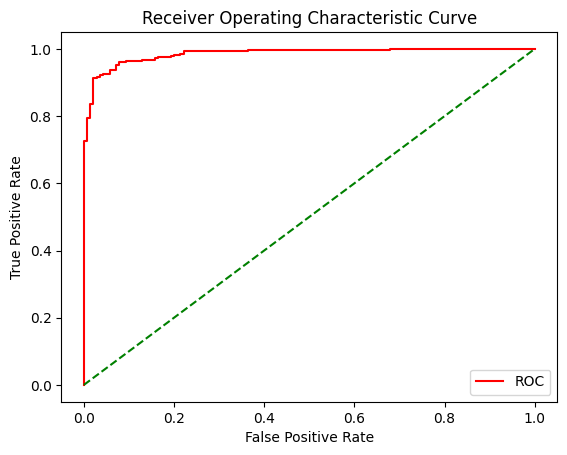

Feature importances
 01_annual_mean_temp: 38.2
10_mean_temp_warmest_quarter: 1.4
11_mean_temp_coldest_quarter: 14.5
12_annual_precipitation: 1.9
13_precipitation_wettest_month: 1.2
14_precipitation_driest_month: 2.4
15_precipitation_seasonality: 5.2
16_precipitation_of_wettest_quarter: 2.2
17_precipitation_of_driest_quarter: 1.8
18_precipitation_of_warmest_quarter: 3.9
19_precipitation_of_coldest_quarter: 2.6
02_mean_diurnal_range: 2.6
    03_isothermality: 2.2
04_temperature_seasonality: 2.4
05_maximum_temp_warmest_month: 1.7
06_minimum_temp_coldest_month: 5.8
07_temp_annual_range: 2.1
08_mean_temp_wettest_quarter: 1.5
09_mean_temp_driest_quarter: 6.3

LGBM
[LightGBM] [Info] Number of positive: 1835, number of negative: 434
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4841
[LightGBM] [Info] Number of data points in the train set: 2269, numbe

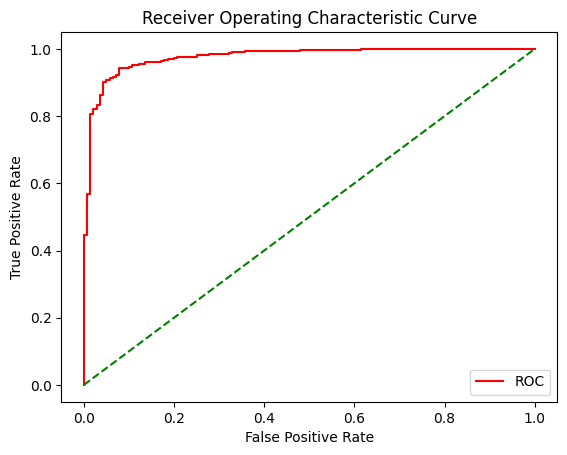

Feature importances
 01_annual_mean_temp: 11000
10_mean_temp_warmest_quarter: 7600
11_mean_temp_coldest_quarter: 12300
12_annual_precipitation: 18400
13_precipitation_wettest_month: 18200
14_precipitation_driest_month: 20400
15_precipitation_seasonality: 14300
16_precipitation_of_wettest_quarter: 15800
17_precipitation_of_driest_quarter: 12100
18_precipitation_of_warmest_quarter: 28200
19_precipitation_of_coldest_quarter: 12100
02_mean_diurnal_range: 20100
    03_isothermality: 17000
04_temperature_seasonality: 27300
05_maximum_temp_warmest_month: 8000
06_minimum_temp_coldest_month: 14700
07_temp_annual_range: 20000
08_mean_temp_wettest_quarter: 9300
09_mean_temp_driest_quarter: 13200

Maxent
Maxent 5-fold Cross Validation Accuracy: 72.30 (+/- 4.60)

Accuracy Score: 0.81

Classification report
              precision    recall  f1-score   support

           0       0.89      0.06      0.11       140
           1       0.81      1.00      0.90       570

    accuracy                   

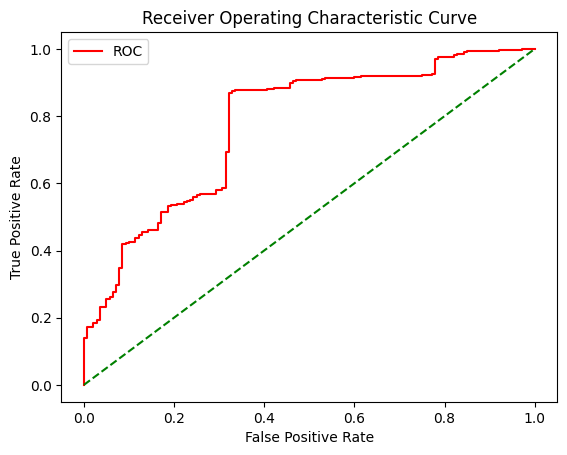

In [13]:
# Spatial prediction
for name, model in CLASS_MAP.items():
    evaluate_clf(model, X, y, name, k=5, test_size=0.2, scoring="f1_weighted", feature_names=X.columns)



RF
RF 5-fold Cross Validation Accuracy: 94.23 (+/- 1.22)

Accuracy Score: 0.94

Classification report
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       140
           1       0.95      0.98      0.96       570

    accuracy                           0.94       710
   macro avg       0.92      0.89      0.90       710
weighted avg       0.94      0.94      0.94       710


Confussion matrix
[[112  28]
 [ 13 557]]

AUC(ROC): 0.89



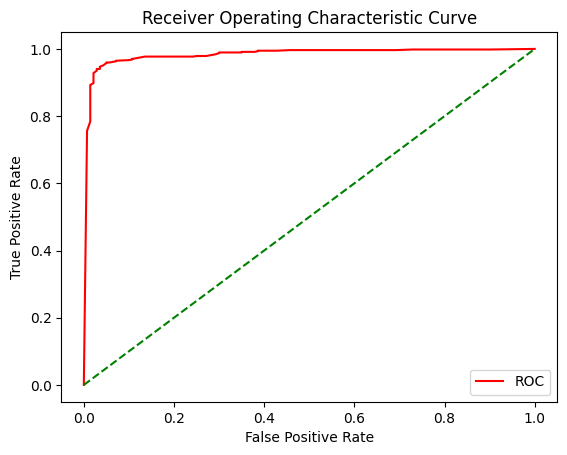

Feature importances
 01_annual_mean_temp: 10.7
12_annual_precipitation: 7.2

ET
ET 5-fold Cross Validation Accuracy: 93.68 (+/- 1.32)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       140
           1       0.96      0.98      0.97       570

    accuracy                           0.95       710
   macro avg       0.93      0.90      0.91       710
weighted avg       0.94      0.95      0.94       710


Confussion matrix
[[114  26]
 [ 13 557]]

AUC(ROC): 0.90



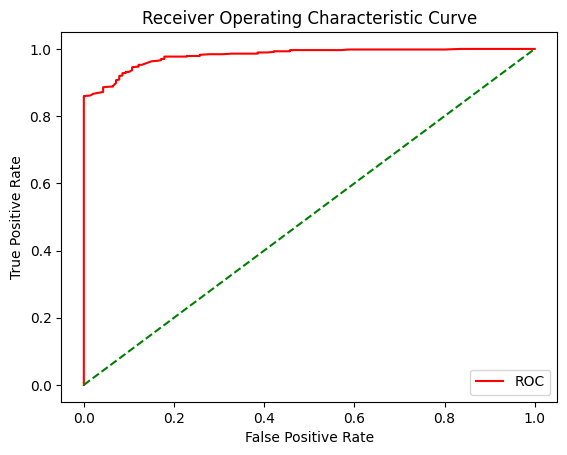

Feature importances
 01_annual_mean_temp: 5.4
12_annual_precipitation: 6.0

ADA


c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scra

ADA 5-fold Cross Validation Accuracy: 91.96 (+/- 1.59)



c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.92

Classification report
              precision    recall  f1-score   support

           0       0.84      0.74      0.78       140
           1       0.94      0.96      0.95       570

    accuracy                           0.92       710
   macro avg       0.89      0.85      0.87       710
weighted avg       0.92      0.92      0.92       710


Confussion matrix
[[103  37]
 [ 20 550]]

AUC(ROC): 0.85



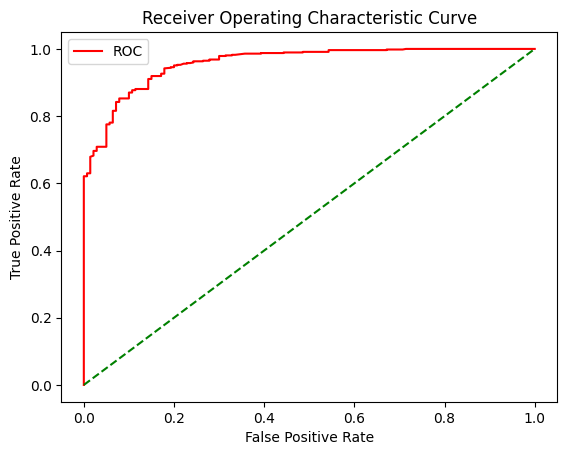

Feature importances
 01_annual_mean_temp: 2.0
12_annual_precipitation: 0.0

BAG
BAG 5-fold Cross Validation Accuracy: 93.68 (+/- 1.94)

Accuracy Score: 0.93

Classification report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       140
           1       0.96      0.96      0.96       570

    accuracy                           0.93       710
   macro avg       0.89      0.90      0.90       710
weighted avg       0.93      0.93      0.93       710


Confussion matrix
[[117  23]
 [ 24 546]]

AUC(ROC): 0.90



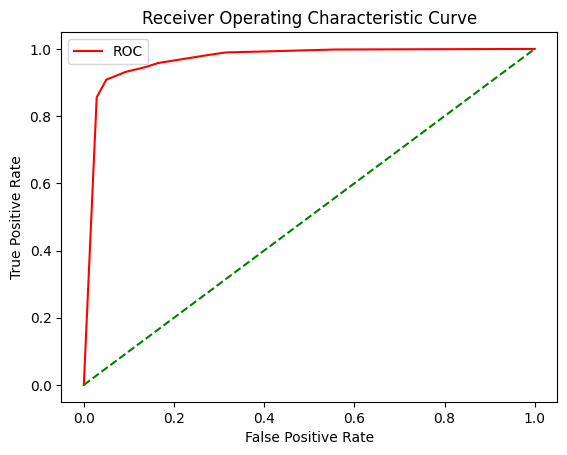

GRA
GRA 5-fold Cross Validation Accuracy: 93.34 (+/- 1.15)

Accuracy Score: 0.93

Classification report
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       140
           1       0.94      0.98      0.96       570

    accuracy                           0.93       710
   macro avg       0.91      0.87      0.89       710
weighted avg       0.93      0.93      0.93       710


Confussion matrix
[[107  33]
 [ 14 556]]

AUC(ROC): 0.87



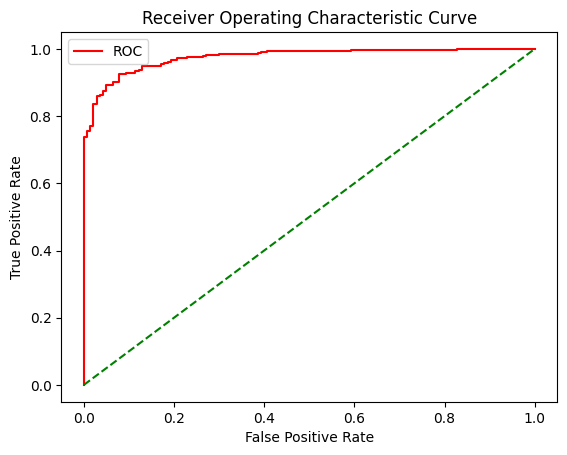

Feature importances
 01_annual_mean_temp: 31.5
12_annual_precipitation: 0.7

XGB
XGB 5-fold Cross Validation Accuracy: 93.84 (+/- 2.85)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       140
           1       0.96      0.97      0.97       570

    accuracy                           0.95       710
   macro avg       0.92      0.90      0.91       710
weighted avg       0.94      0.95      0.94       710


Confussion matrix
[[116  24]
 [ 15 555]]

AUC(ROC): 0.90



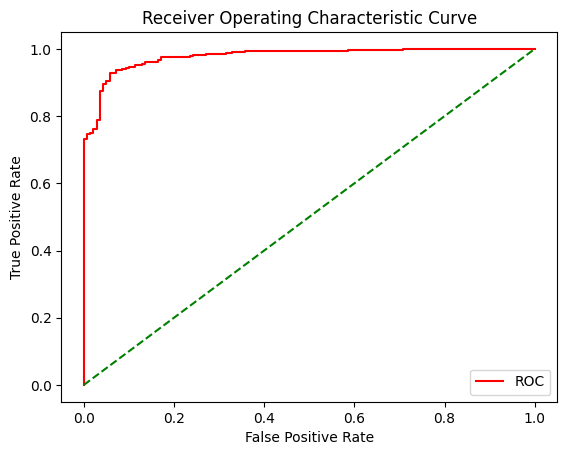

Feature importances
 01_annual_mean_temp: 23.2
12_annual_precipitation: 1.7

LGBM
[LightGBM] [Info] Number of positive: 1820, number of negative: 449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4842
[LightGBM] [Info] Number of data points in the train set: 2269, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.802115 -> initscore=1.399569
[LightGBM] [Info] Start training from score 1.399569
[LightGBM] [Info] Number of positive: 1824, number of negative: 445
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4842
[LightGBM] [Info] Number of data points in the train set: 2269, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.803878 -> initscore=1.41

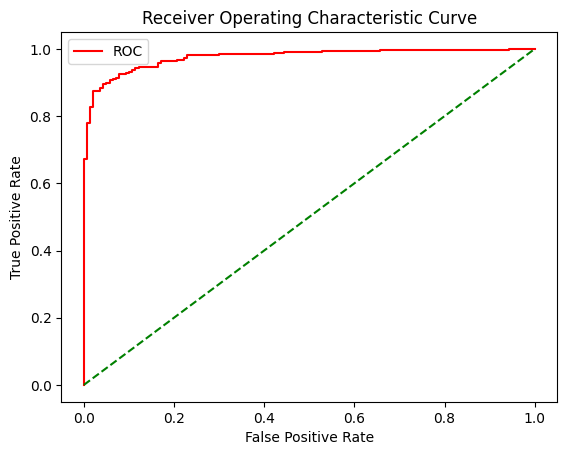

Feature importances
 01_annual_mean_temp: 9200
12_annual_precipitation: 5700

Maxent
Maxent 5-fold Cross Validation Accuracy: 72.30 (+/- 3.46)

Accuracy Score: 0.81

Classification report
              precision    recall  f1-score   support

           0       0.69      0.06      0.12       140
           1       0.81      0.99      0.89       570

    accuracy                           0.81       710
   macro avg       0.75      0.53      0.51       710
weighted avg       0.79      0.81      0.74       710


Confussion matrix
[[  9 131]
 [  4 566]]

AUC(ROC): 0.53



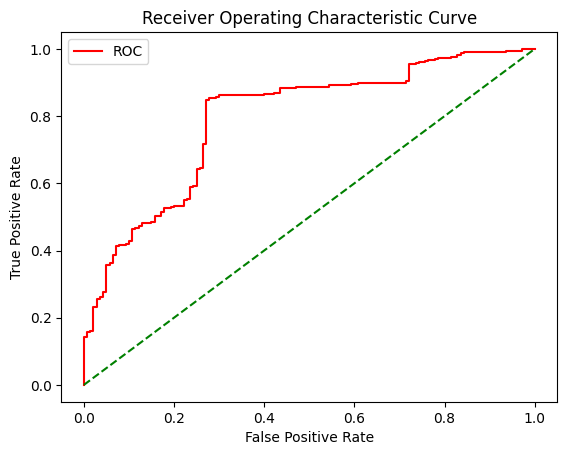

In [14]:
# Spatial prediction
for name, model in CLASS_MAP.items():
    evaluate_clf(model, X, y, name, k=5, test_size=0.2, scoring="f1_weighted", feature_names=even_smaller_columns)

RF
RF 10-fold Cross Validation Accuracy: 93.95 (+/- 2.85)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       140
           1       0.95      0.99      0.97       570

    accuracy                           0.95       710
   macro avg       0.94      0.89      0.91       710
weighted avg       0.95      0.95      0.95       710


Confussion matrix
[[111  29]
 [  8 562]]

AUC(ROC): 0.89



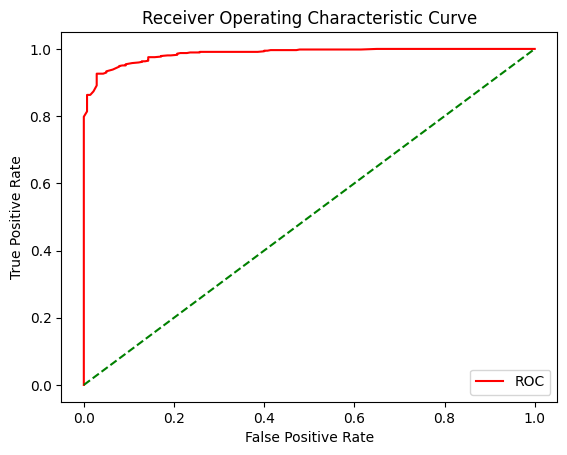

Feature importances
 01_annual_mean_temp: 12.0
12_annual_precipitation: 7.9
04_temperature_seasonality: 8.2
06_minimum_temp_coldest_month: 3.2
07_temp_annual_range: 2.7

ET
ET 10-fold Cross Validation Accuracy: 93.98 (+/- 2.26)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       140
           1       0.96      0.99      0.97       570

    accuracy                           0.95       710
   macro avg       0.95      0.90      0.93       710
weighted avg       0.95      0.95      0.95       710


Confussion matrix
[[115  25]
 [  7 563]]

AUC(ROC): 0.90



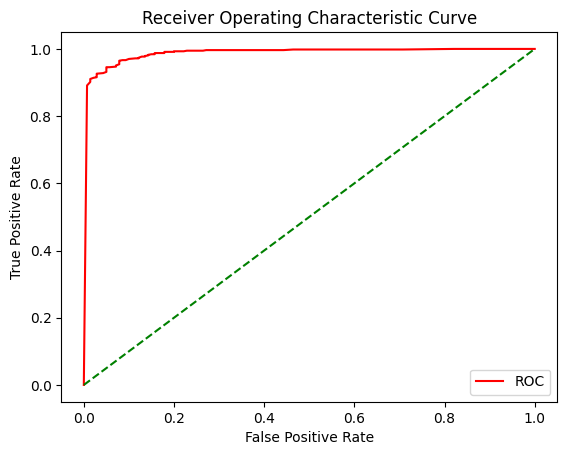

Feature importances
 01_annual_mean_temp: 5.4
12_annual_precipitation: 7.6
04_temperature_seasonality: 7.0
06_minimum_temp_coldest_month: 3.3
07_temp_annual_range: 3.6

ADA


c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scra

ADA 10-fold Cross Validation Accuracy: 91.97 (+/- 2.37)



c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.93

Classification report
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       140
           1       0.94      0.97      0.96       570

    accuracy                           0.93       710
   macro avg       0.90      0.86      0.88       710
weighted avg       0.92      0.93      0.92       710


Confussion matrix
[[105  35]
 [ 17 553]]

AUC(ROC): 0.86



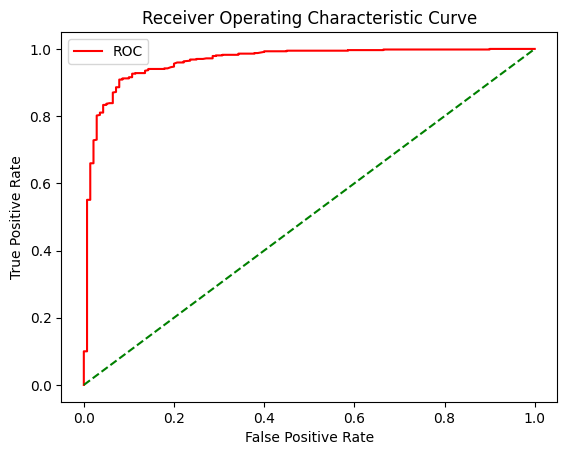

Feature importances
 01_annual_mean_temp: 2.0
12_annual_precipitation: 0.0
04_temperature_seasonality: 8.0
06_minimum_temp_coldest_month: 4.0
07_temp_annual_range: 4.0

BAG
BAG 10-fold Cross Validation Accuracy: 93.27 (+/- 2.36)

Accuracy Score: 0.94

Classification report
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       140
           1       0.96      0.97      0.96       570

    accuracy                           0.94       710
   macro avg       0.91      0.91      0.91       710
weighted avg       0.94      0.94      0.94       710


Confussion matrix
[[119  21]
 [ 19 551]]

AUC(ROC): 0.91



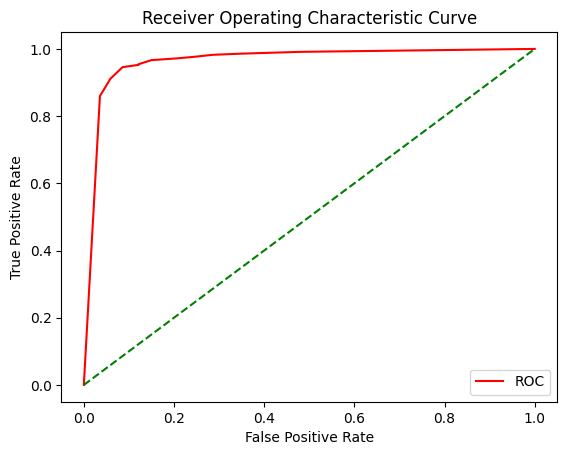

GRA
GRA 10-fold Cross Validation Accuracy: 93.27 (+/- 2.92)

Accuracy Score: 0.94

Classification report
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       140
           1       0.94      0.98      0.96       570

    accuracy                           0.94       710
   macro avg       0.92      0.87      0.89       710
weighted avg       0.93      0.94      0.93       710


Confussion matrix
[[105  35]
 [ 11 559]]

AUC(ROC): 0.87



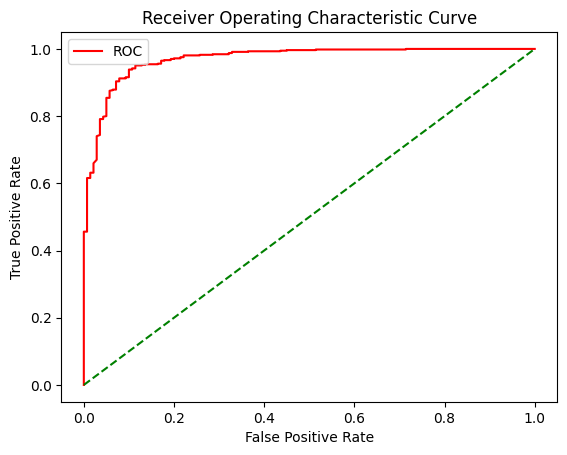

Feature importances
 01_annual_mean_temp: 38.1
12_annual_precipitation: 0.8
04_temperature_seasonality: 9.8
06_minimum_temp_coldest_month: 2.2
07_temp_annual_range: 1.0

XGB
XGB 10-fold Cross Validation Accuracy: 93.65 (+/- 2.14)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       140
           1       0.95      0.98      0.97       570

    accuracy                           0.95       710
   macro avg       0.93      0.89      0.91       710
weighted avg       0.95      0.95      0.95       710


Confussion matrix
[[113  27]
 [ 11 559]]

AUC(ROC): 0.89



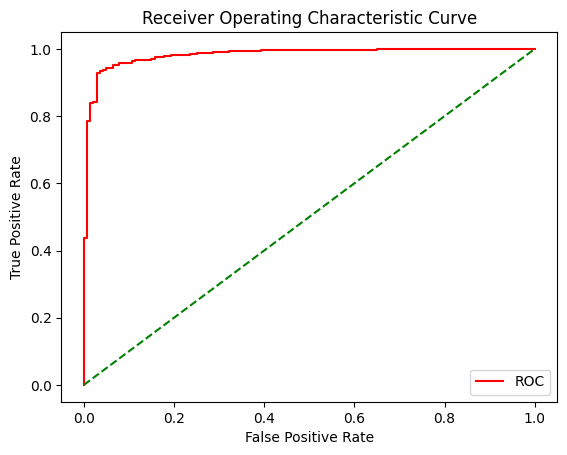

Feature importances
 01_annual_mean_temp: 27.5
12_annual_precipitation: 2.5
04_temperature_seasonality: 24.7
06_minimum_temp_coldest_month: 2.1
07_temp_annual_range: 1.4

LGBM
[LightGBM] [Info] Number of positive: 2042, number of negative: 511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4840
[LightGBM] [Info] Number of data points in the train set: 2553, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799843 -> initscore=1.385315
[LightGBM] [Info] Start training from score 1.385315
[LightGBM] [Info] Number of positive: 2032, number of negative: 521
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4841
[LightGB

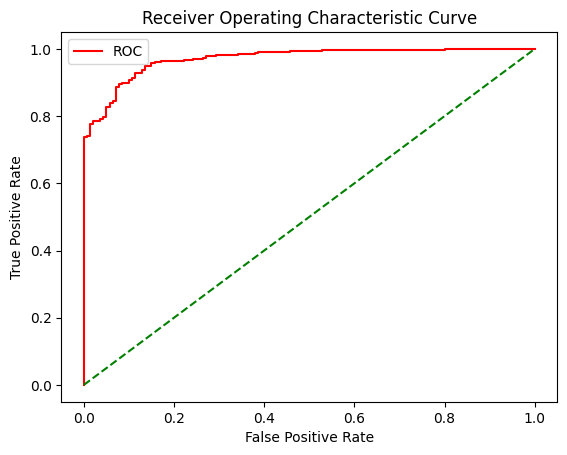

Feature importances
 01_annual_mean_temp: 9400
12_annual_precipitation: 7000
04_temperature_seasonality: 14900
06_minimum_temp_coldest_month: 16100
07_temp_annual_range: 17400

Maxent
Maxent 10-fold Cross Validation Accuracy: 72.43 (+/- 9.06)

Accuracy Score: 0.81

Classification report
              precision    recall  f1-score   support

           0       1.00      0.04      0.08       140
           1       0.81      1.00      0.89       570

    accuracy                           0.81       710
   macro avg       0.90      0.52      0.49       710
weighted avg       0.85      0.81      0.73       710


Confussion matrix
[[  6 134]
 [  0 570]]

AUC(ROC): 0.52



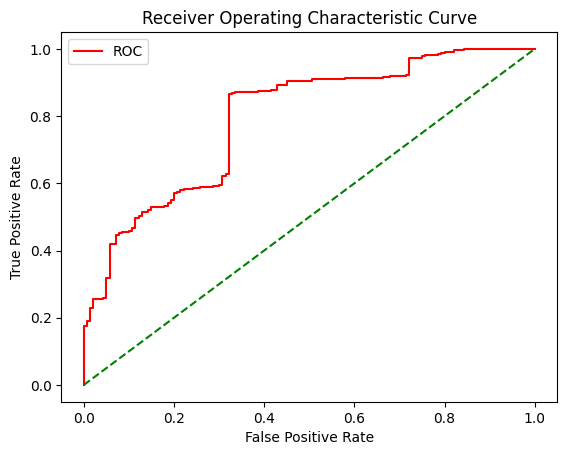

In [15]:
# Spatial prediction
for name, model in CLASS_MAP.items():
    evaluate_clf(model, X, y, name, k=10, test_size=0.2, scoring="f1_weighted", feature_names=small_columns)

